In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## traingng data
data = pd.read_csv('training_data.csv')

# target data
data['Price'] = pd.read_csv('training_data_targets.csv', header=None)

data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000,5417.000000
unique,1787,11,NaN,NaN,5,2,4,435,145,364,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN
freq,43,706,NaN,NaN,2876,3890,4431,159,551,213,NaN,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.900000


In [ ]:
data.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 0
dtype: int64

In [ ]:
# having just the company name for the column 'Brand'
for i in range(len(data['Brand'])):
    brand = data['Brand'][i]
    name = brand.split()
    data['Brand'][i] = data['Brand'][i].replace(brand, name[0])


# ## removing units from mileage, Engine, power
for i in range(len(data['Mileage'])):
    if type(data['Mileage'][i]) == float:  ## to skip null values
        continue
    else:
        brand = data['Mileage'][i]
        name = brand.split(" ")
        data['Mileage'][i] = data['Mileage'][i].replace(brand, name[0])

for i in range(len(data['Engine'])):
    if type(data['Engine'][i]) == float:
        continue
    else:
        brand = data['Engine'][i]
        name = brand.split()
        data['Engine'][i] = data['Engine'][i].replace(brand, name[0])

for i in range(len(data['Power'])):
    if type(data['Power'][i]) == float:
        continue
    else:
        brand = data['Power'][i]
        name = brand.split()
        data['Power'][i] = data['Power'][i].replace(brand, name[0])

In [ ]:
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000,5417.000000
unique,29,11,NaN,NaN,5,2,4,425,145,364,NaN,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,17.0,1197,74,NaN,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,160,551,213,NaN,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.900000


In [ ]:
## converting 'seats' to a discrete type format
data['Seats'] = data['Seats'].astype(str)
# data['Year'] = data['Year'].astype(str) # reagrding year as a continuous type for now.

## converting 'Mileage', 'Engine', 'Power' to continuous type format
data['Mileage'] = data['Mileage'].astype(float)

data['Engine'] = data['Engine'].astype(float)

for i in range(len(data['Power'])):
    try:
        data['Power'][i] = data['Power'][i].astype(float)
    except:
        if data['Power'][i] == 'null':
            data['Power'][i] = None

data['Power'] = data['Power'].astype(float)

In [ ]:
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416.000000,5383.000000,5288.000000,5417,5417.000000
unique,29,11,NaN,NaN,5,2,4,NaN,NaN,NaN,10,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,NaN,NaN,NaN,4506,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,18.148545,1620.775218,113.088034,NaN,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,4.554510,602.809364,54.004647,NaN,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1197.000000,75.940000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,18.160000,1493.000000,97.700000,NaN,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1973.500000,138.100000,NaN,9.900000


### Dealing with missing values

> Missing values are present in Mileage, engine, power

> to fill these, I am using median, as it will prevent any case of outliers

In [ ]:
# using .fillna() to fill the missing values

data['Mileage'].fillna(data['Mileage'].median(), inplace = True)
data['Engine'].fillna(data['Engine'].median(), inplace = True)
data['Power'].fillna(data['Power'].median(), inplace = True)
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5417.000000,5417.000000,5417.000000,5417,5417.000000
unique,29,11,NaN,NaN,5,2,4,NaN,NaN,NaN,10,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,NaN,NaN,NaN,4506,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,18.148547,1619.973232,112.721585,NaN,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,4.554090,600.998998,53.409188,NaN,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,78.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,18.160000,1493.000000,97.700000,NaN,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.030000,NaN,9.900000


### Dealing and Checking Outliers

> We are going to plot only continuous type variables to check outliers

> if they are present, replace them with median , check using IQR method.

> IQR = Inter Quartile Range

In [ ]:
conti_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
# price is our target varibale, so we are not going to replace any values in it, for now.

In [ ]:
def handle_outliers_iqr(df, continuous_columns, thresh = 1.5):
    for column in continuous_columns:
        # Calculate IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - thresh * IQR
        upper_bound = Q3 + thresh * IQR

        # Identify and handle outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        df.loc[outliers, column] = df[column].median()  # Replace outliers with the median

    return df

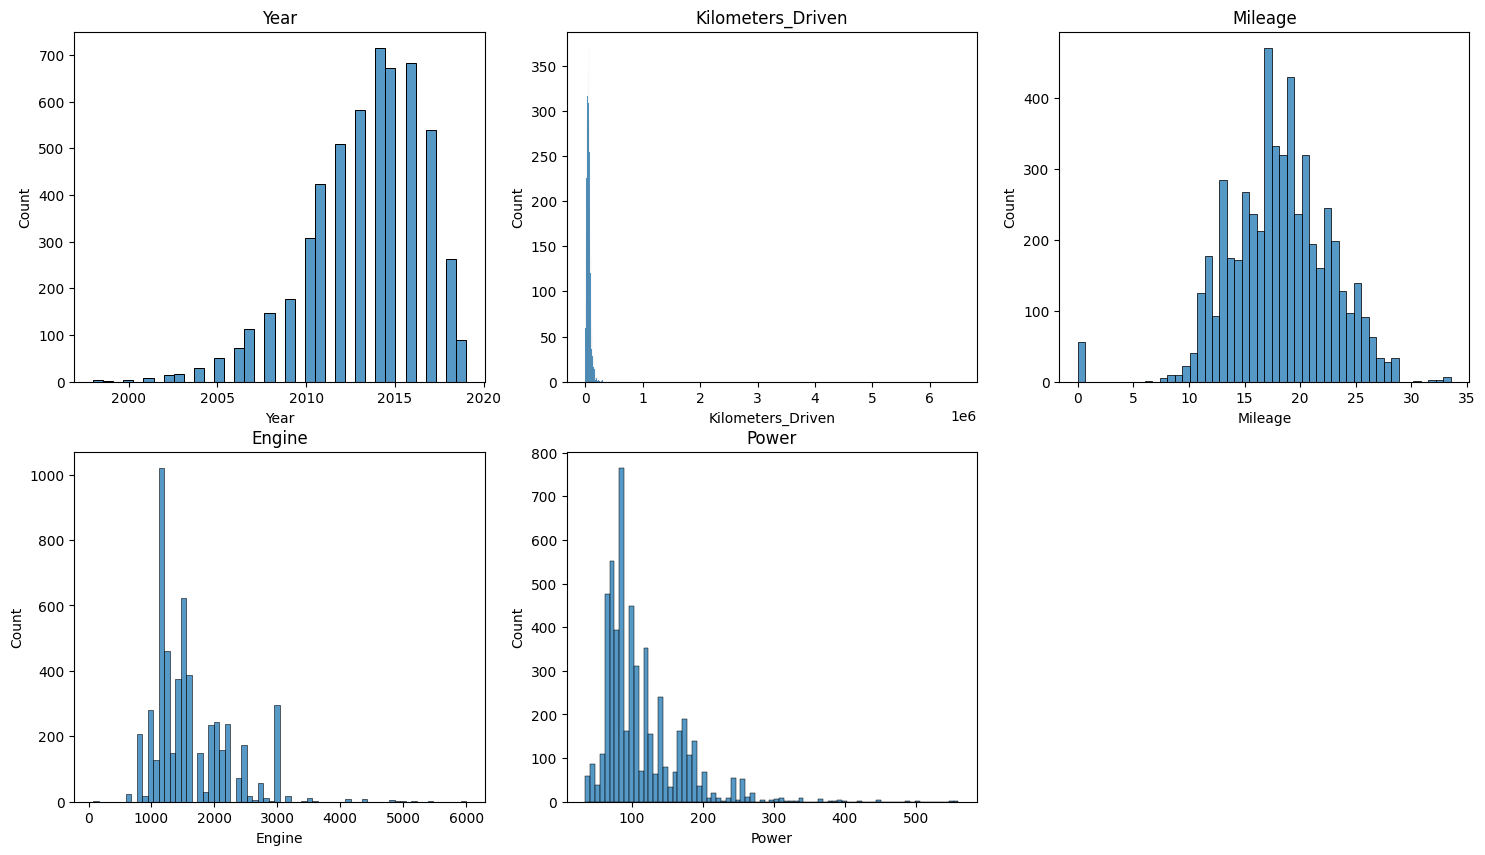

In [ ]:
# plotting variable before removing outliers

plt.figure(figsize = (18, 10))

for i in range(len(conti_features)):
  plt.subplot(2, 3, i+1)
  sns.histplot(data[conti_features[i]])
  plt.title(conti_features[i])

plt.show()


In [ ]:
# removing outliers from the data
data = handle_outliers_iqr(data, conti_features)

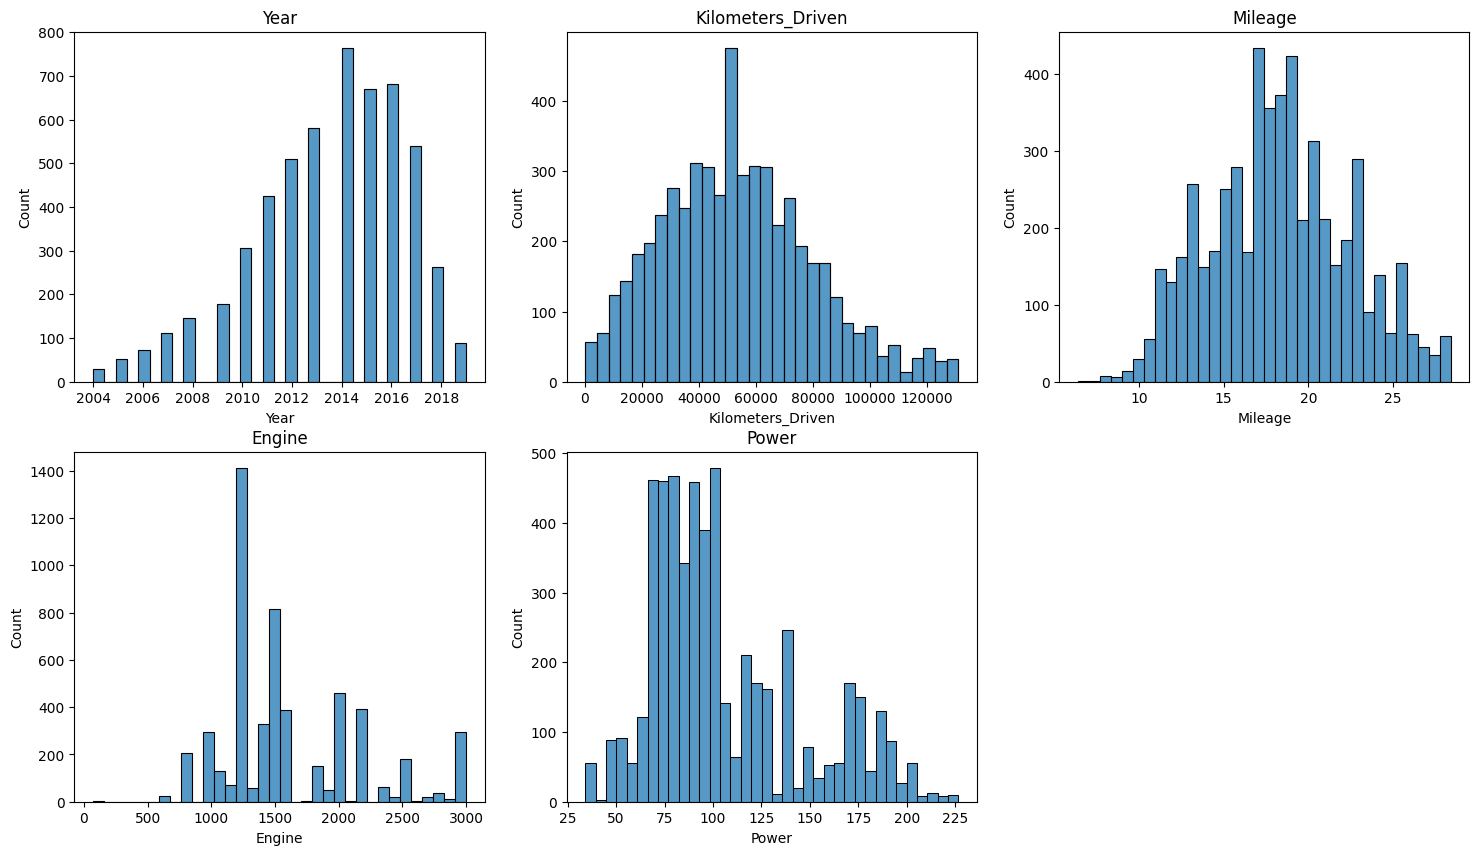

In [ ]:
# plotting data after replacing outliers

plt.figure(figsize = (18, 10))

for i in range(len(conti_features)):
  plt.subplot(2, 3, i+1)
  sns.histplot(data[conti_features[i]])
  plt.title(conti_features[i])

plt.show()

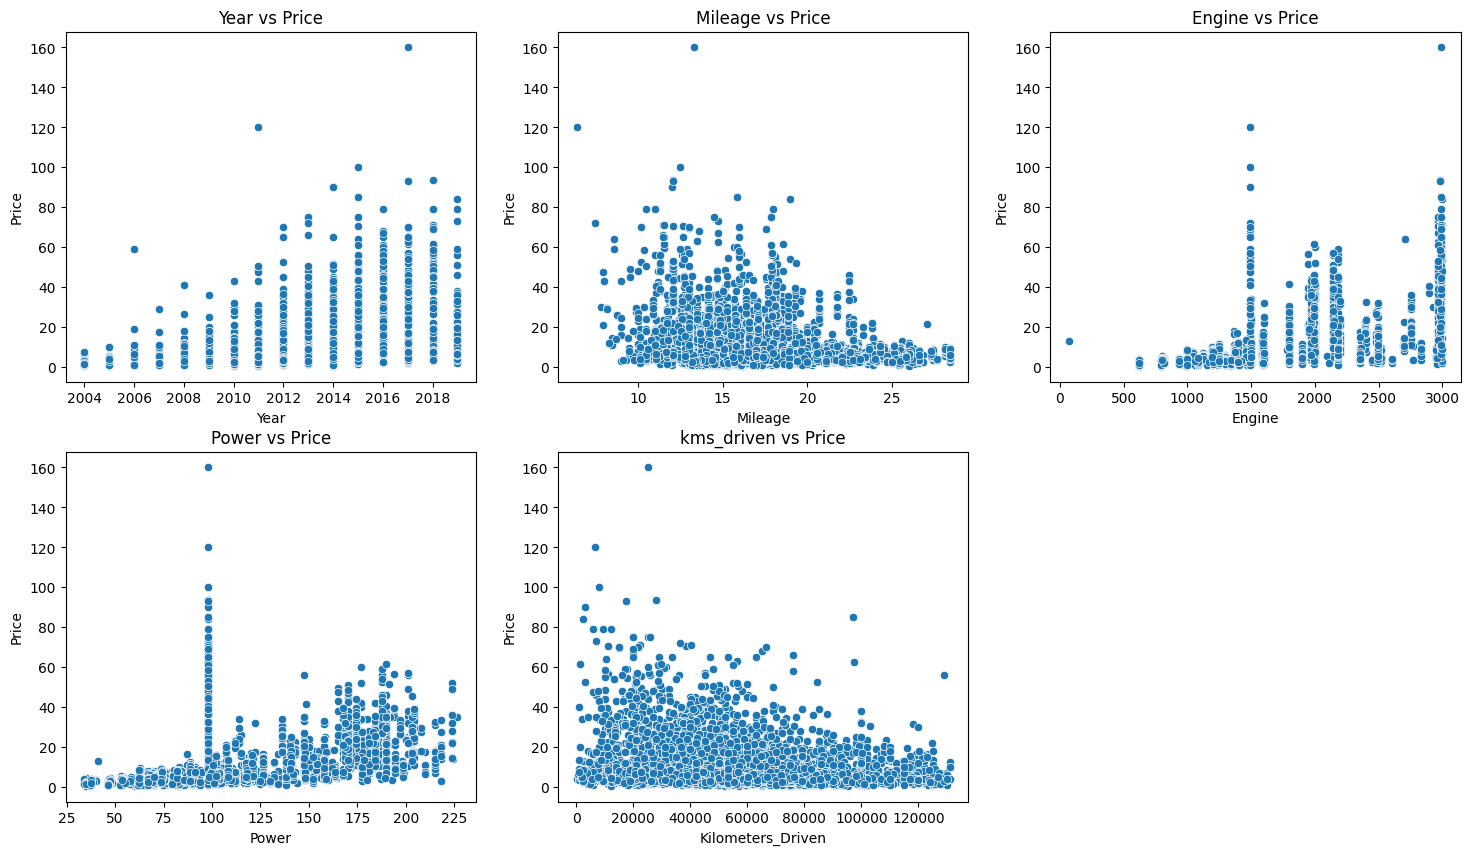

In [ ]:
# checking the linearity and relation of price vs conti_features

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x = data['Year'], y = data['Price'])
plt.title('Year vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x = data['Mileage'], y = data['Price'])
plt.title('Mileage vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x = data['Engine'], y = data['Price'])
plt.title('Engine vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x = data['Power'], y = data['Price'])
plt.title('Power vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x = data['Kilometers_Driven'], y = data['Price'])
plt.title('kms_driven vs Price')

plt.show()

In [ ]:
# since relation is not linear, using log transformation on price to make it linear
log_price = np.log(data['Price'])
data['log_price'] = log_price



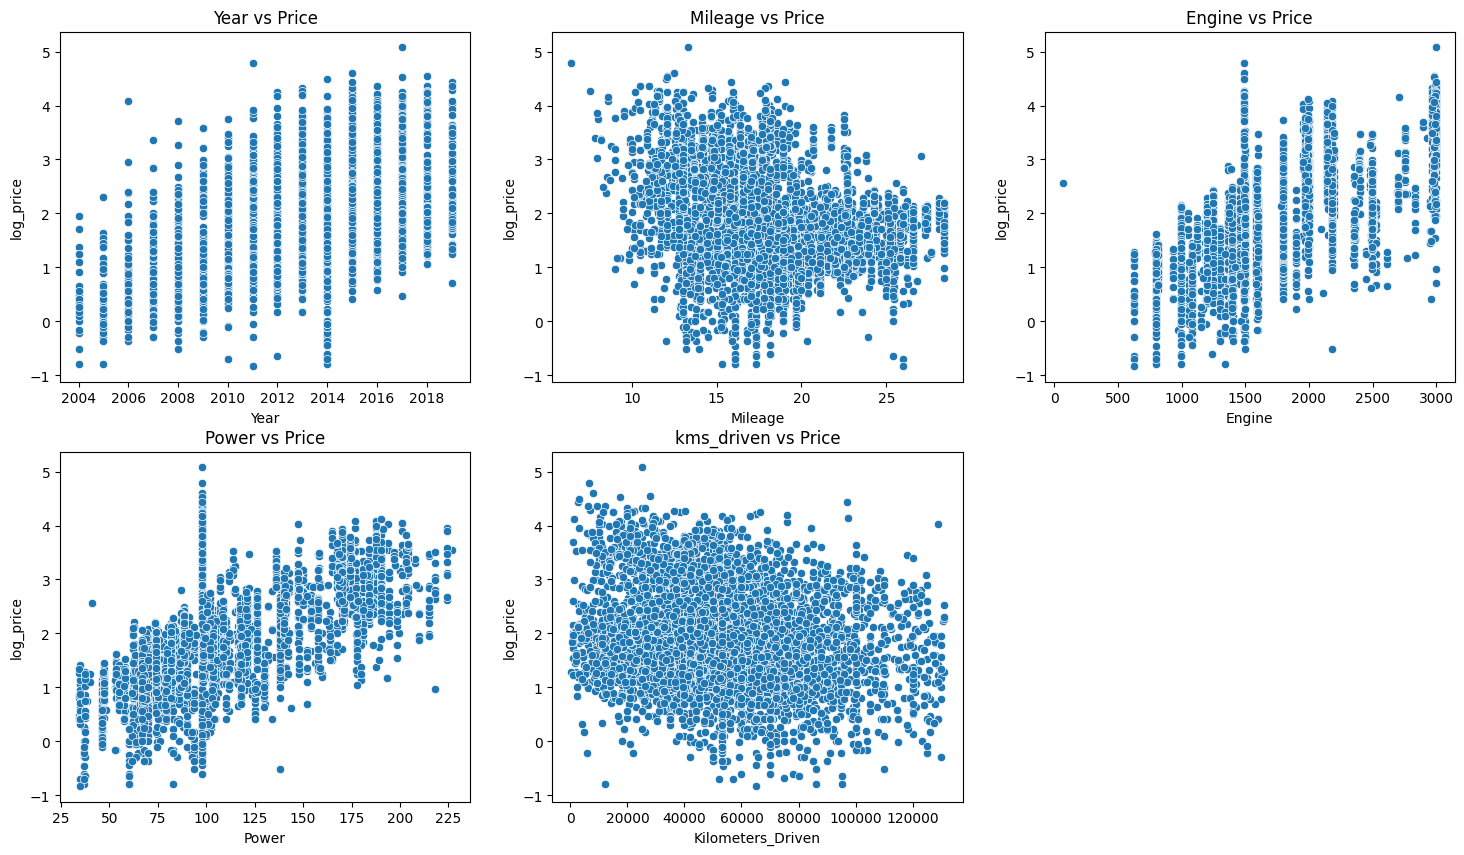

In [ ]:
# checking again against log price

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x = data['Year'], y = data['log_price'])
plt.title('Year vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x = data['Mileage'], y = data['log_price'])
plt.title('Mileage vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x = data['Engine'], y = data['log_price'])
plt.title('Engine vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x = data['Power'], y = data['log_price'])
plt.title('Power vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x = data['Kilometers_Driven'], y = data['log_price'])
plt.title('kms_driven vs Price')

plt.show()

In [ ]:
### checking coorelation of elements for the possibility of overfitting

conti_features.append('Price')
corr_mat = data[conti_features].corr()
print(corr_mat)

# if correlation of two features is equal to or close to 1, we can remove the feature
## this is not the case in the given data

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.479688  0.293139 -0.057073  0.020308   
Kilometers_Driven -0.479688           1.000000 -0.121144  0.166480  0.059363   
Mileage            0.293139          -0.121144  1.000000 -0.620689 -0.497743   
Engine            -0.057073           0.166480 -0.620689  1.000000  0.686464   
Power              0.020308           0.059363 -0.497743  0.686464  1.000000   
Price              0.295520          -0.182909 -0.331490  0.589943  0.492306   

                      Price  
Year               0.295520  
Kilometers_Driven -0.182909  
Mileage           -0.331490  
Engine             0.589943  
Power              0.492306  
Price              1.000000  


In [ ]:
csv_path = os.getcwd()+ '/data.csv'
data.to_csv(csv_path, index = False)

## moving on with training of the data and updating the data accordingly

> Linear Regression

> LR with adaptive boosting

> LR with Bootstrap aggregating(bagging regressor)


> Random Forest Classifier

> Decision Tree Regressor

> Adaptive boosting with Decision Tree and GridSearchCV

> Support Vector Machine Regressor

> SVR with grid search


In [ ]:
def remove_outliers(y_test, y_predicted, threshold):
    # Find indices of outliers in y_predicted
    outlier_indices = [i for i, (true_val, pred_val) in enumerate(zip(y_test, y_predicted)) if abs(pred_val - true_val) > threshold]

    # Remove outliers from both lists
    y_test_filtered = [val for i, val in enumerate(y_test) if i not in outlier_indices]
    y_predicted_filtered = [val for i, val in enumerate(y_predicted) if i not in outlier_indices]

    return y_test_filtered, y_predicted_filtered

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVR
from random import randint

#### Linear Regression


In [ ]:
# data for linear regrr

data_lr = data.copy()

data_lr.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,log_price
count,5417,5417,5417.000000,5417.000000,5417,5417,5417,5417.000000,5417.000000,5417.000000,5417,5417.000000,5417.000000
unique,29,11,NaN,NaN,5,2,4,NaN,NaN,NaN,10,NaN,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,NaN,NaN,NaN,4506,NaN,NaN
mean,NaN,NaN,2013.476278,53487.739524,NaN,NaN,NaN,18.303936,1595.252723,105.466082,NaN,9.453670,1.823755
std,NaN,NaN,3.080625,26411.083241,NaN,NaN,NaN,4.103011,547.443703,39.110556,NaN,11.166658,0.872723
min,NaN,NaN,2004.000000,171.000000,NaN,NaN,NaN,6.400000,72.000000,34.200000,NaN,0.440000,-0.820981
25%,NaN,NaN,2012.000000,34000.000000,NaN,NaN,NaN,15.400000,1198.000000,78.000000,NaN,3.500000,1.252763
50%,NaN,NaN,2014.000000,53293.000000,NaN,NaN,NaN,18.160000,1493.000000,97.700000,NaN,5.650000,1.731656
75%,NaN,NaN,2016.000000,70000.000000,NaN,NaN,NaN,21.100000,1968.000000,126.200000,NaN,9.900000,2.292535


In [ ]:
# converting the data to dummy varibales
data_lr  = pd.get_dummies(data_lr, drop_first = True)

# traing and target variable
X = data_lr.drop(['Price', 'log_price'], axis = 1)
Y = data_lr['log_price']

data_lr.shape


(5417, 62)

In [ ]:
data_lr.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,log_price,Brand_BMW,Brand_Bentley,Brand_Chevrolet,...,Owner_Type_Third,Seats_10.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_nan
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,...,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,2013.476278,53487.739524,18.303936,1595.252723,105.466082,9.453670,1.823755,0.043382,0.000185,0.019199,...,0.019014,0.000738,0.002584,0.016984,0.831826,0.004984,0.112055,0.023260,0.000369,0.007015
std,3.080625,26411.083241,4.103011,547.443703,39.110556,11.166658,0.872723,0.203734,0.013587,0.137236,...,0.136587,0.027166,0.050776,0.129222,0.374055,0.070430,0.315463,0.150742,0.019213,0.083469
min,2004.000000,171.000000,6.400000,72.000000,34.200000,0.440000,-0.820981,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,34000.000000,15.400000,1198.000000,78.000000,3.500000,1.252763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,53293.000000,18.160000,1493.000000,97.700000,5.650000,1.731656,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,70000.000000,21.100000,1968.000000,126.200000,9.900000,2.292535,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,131000.000000,28.400000,2999.000000,226.600000,160.000000,5.075174,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 21, test_size = 0.2)

x_train.shape, x_test.shape

((4333, 60), (1084, 60))

In [ ]:
# defining the classifier
lr = LinearRegression()

# fittin the model
lr.fit(x_train, y_train)


LinearRegression()

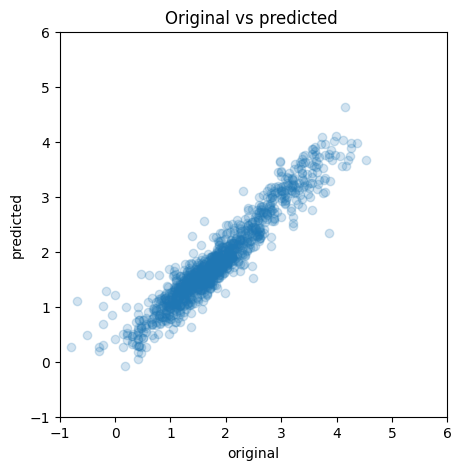

In [ ]:
# evaluating
y_pred = lr.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.19925033792990401 
Mean Squared Error: 0.07387143962841543
R2 Score: 0.8993423629016356


#### Linear Regression with AdaBoost regression

In [ ]:
base_model = LinearRegression()

adaBoost_model = AdaBoostRegressor(base_model, n_estimators = 50, random_state = 21)
adaBoost_model.fit(x_train, y_train)


AdaBoostRegressor(estimator=LinearRegression(), random_state=21)

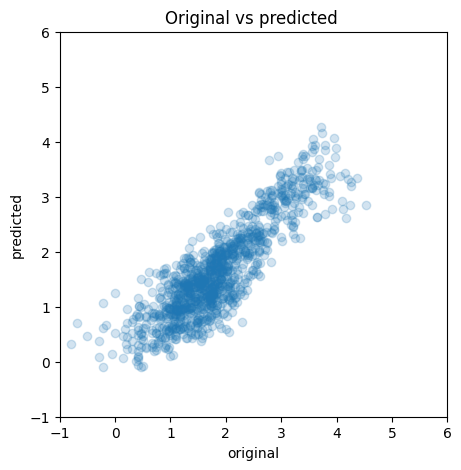

In [ ]:
# evaluating
y_pred = adaBoost_model.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.37465741081030546 
Mean Squared Error: 0.23100195252342295
R2 Score: 0.6852354465666575


#### Linear Regression using bagging method

In [ ]:
base_model = LinearRegression()
bagging_model = BaggingRegressor(base_model, n_estimators = 50, random_state = 21)
bagging_model.fit(x_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=21)

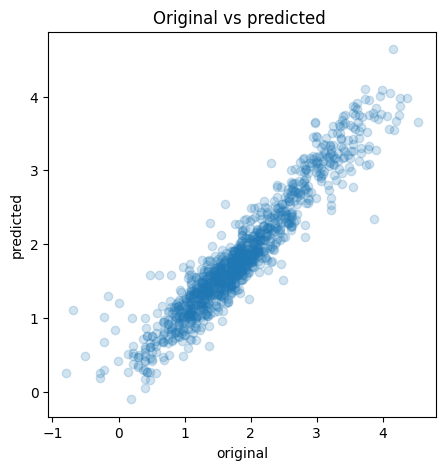

In [ ]:
# evaluating
y_pred = bagging_model.predict(x_test)

y1_pred, y1_test = remove_outliers(y_pred, y_test, 20)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y1_test, y1_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
#plt.xlim((-1, 6))
#plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y1_test, y1_pred)
MAE = mean_absolute_error(y1_test, y1_pred)
R2 = r2_score(y1_test, y1_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.19906014417283216 
Mean Squared Error: 0.07392747215648378
R2 Score: 0.8994404815091164


#### Random Forest Regressor


Using one-hot-encoding for location, brand, fuel_type, transmission_type

Using label encoder for owner, seats

In [ ]:
## data preparation

data_rf = data.copy()

# initializing dictionaries to store encoded info.
owner_dict = dict()
seats_dict = dict()

# encoding
le = LabelEncoder()
ohe = OneHotEncoder()

# Label encoding
data_rf['owner_enc'] = le.fit_transform(data_rf['Owner_Type'])
for idx, label in enumerate(le.classes_):
    owner_dict[label] = idx

data_rf['seats_enc'] = le.fit_transform(data_rf['Seats'])
for idx, label in enumerate(le.classes_):
    seats_dict[label] = idx

# one-hot-encoder
brand_encoded = ohe.fit_transform(data_rf[['Brand']])
brand_encoded_df = pd.DataFrame(brand_encoded.toarray(), columns=ohe.get_feature_names_out(['Brand']))
data_rf = pd.concat([data_rf, brand_encoded_df], axis=1)


location_encoded = ohe.fit_transform(data_rf[['Location']])
location_encoded_df = pd.DataFrame(location_encoded.toarray(), columns=ohe.get_feature_names_out(['Location']))
data_rf = pd.concat([data_rf, location_encoded_df], axis=1)


fuel_encoded = ohe.fit_transform(data_rf[['Fuel_Type']])
fuel_encoded_df = pd.DataFrame(fuel_encoded.toarray(), columns=ohe.get_feature_names_out(['Fuel_Type']))
data_rf = pd.concat([data_rf, fuel_encoded_df], axis=1)

transmission_encoded = ohe.fit_transform(data_rf[['Transmission']])
transmission_encoded_df = pd.DataFrame(transmission_encoded.toarray(), columns=ohe.get_feature_names_out(['Transmission']))
data_rf = pd.concat([data_rf, transmission_encoded_df], axis=1)


discrete_features = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
data_rf = data_rf.drop(discrete_features, axis = 1)

data_rf.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,log_price,owner_enc,seats_enc,Brand_Audi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,...,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,2013.476278,53487.739524,18.303936,1595.252723,105.466082,9.453670,1.823755,0.381577,4.310319,0.038398,...,0.087687,0.130330,0.104117,0.009046,0.530921,0.000185,0.001661,0.458187,0.281890,0.718110
std,3.080625,26411.083241,4.103011,547.443703,39.110556,11.166658,0.872723,0.820514,0.885772,0.192172,...,0.282865,0.336698,0.305440,0.094686,0.499089,0.013587,0.040731,0.498295,0.449962,0.449962
min,2004.000000,171.000000,6.400000,72.000000,34.200000,0.440000,-0.820981,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,34000.000000,15.400000,1198.000000,78.000000,3.500000,1.252763,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,53293.000000,18.160000,1493.000000,97.700000,5.650000,1.731656,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,70000.000000,21.100000,1968.000000,126.200000,9.900000,2.292535,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2019.000000,131000.000000,28.400000,2999.000000,226.600000,160.000000,5.075174,3.000000,9.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
rf = RandomForestRegressor()

random_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf, random_params, n_iter = 10, cv = 5)
# change scoring to 'f1_macro'


random_search.fit(x_train, y_train)

random_search.best_params_, random_search.best_score_

({'n_estimators': 300,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.9273802974718812)

In [ ]:
grid_params = {
    'n_estimators': [200,300],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [15, 20],
    'bootstrap': [True]
    }

grid_search = GridSearchCV(rf, grid_params, cv = 5) # by default, scoring is R2

grid_search.fit(x_train, y_train)

grid_search.best_score_

0.920234303972094

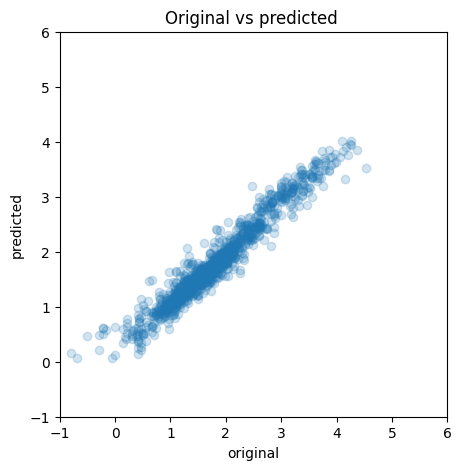

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.15127836091092514 
Mean Squared Error: 0.044704578199255406
R2 Score: 0.9390852915328161


In [ ]:
## using now data_rf to train the model

X = data_rf.drop(['log_price', 'Price'], axis = 1)
Y = data_rf['log_price']
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 21, test_size = 0.2)

In [ ]:
rf1 = RandomForestRegressor()

random_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf, random_params, n_iter = 10, cv = 5)
# change scoring to 'f1_macro'


random_search.fit(x_train, y_train)

random_search.best_params_, random_search.best_score_

({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': None,
  'bootstrap': False},
 0.9051117154426016)

In [ ]:
grid_params = {
    'n_estimators': [250, 300],
    'min_samples_split': [5],
    'min_samples_leaf': [3, 4],
    'max_features': ['auto', 'log2'],
    'max_depth': [None, 10],
    'bootstrap': [False]
    }

grid_search = GridSearchCV(rf, grid_params, cv = 5) # by default, scoring is R2

grid_search.fit(x_train, y_train)

grid_search.best_score_

0.8923539680698935

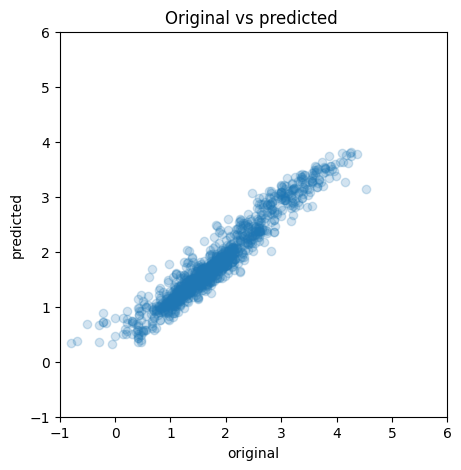

In [ ]:
best_model = grid_search.best_estimator_

y_pred = grid_search.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.18233566822436825 
Mean Squared Error: 0.06355002961371085
R2 Score: 0.9134063739569166


### Decision Tree Regressor

In [ ]:
# using X and Y from data_rf, as teh data is label encoded and one-hot-encoded, properly
X = data_rf.drop(['log_price', 'Price'], axis = 1)
Y = data_rf['log_price']
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 21, test_size = 0.2)





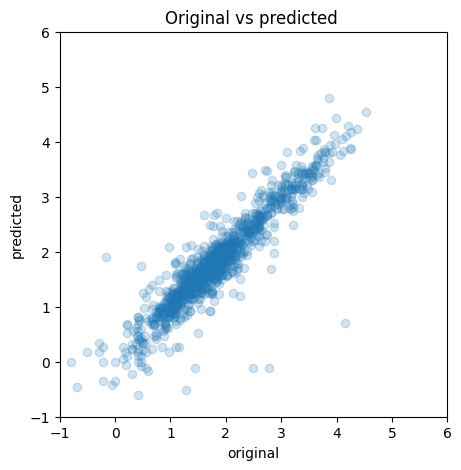

Mean Absolute Error: 0.2053627585361077 
Mean Squared Error: 0.10633967127333867
R2 Score: 0.8994404815091164


In [ ]:
# defining classifier
dt = DecisionTreeRegressor()
# training
dt.fit(x_train, y_train)

# prediciton and evalustion
y_pred = dt.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

### Decision Tree Regressor with AdaBoosting and GridSearchCV

In [ ]:
dt1 = DecisionTreeRegressor()

adaDt = AdaBoostRegressor(dt1, n_estimators = 50, random_state = 21)

random_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'base_estimator__min_samples_split': [2, 5, 10, 15, 20],
    'base_estimator__min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(adaDt, random_params, n_iter = 10, cv = 5)

random_search.fit(x_train, y_train)

random_search.best_params_, random_search.best_score_

({'n_estimators': 400,
  'learning_rate': 1,
  'base_estimator__min_samples_split': 5,
  'base_estimator__min_samples_leaf': 10,
  'base_estimator__max_depth': 9},
 0.913475822846633)

In [ ]:
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators']],
    'learning_rate': [random_search.best_params_['learning_rate']],
    'base_estimator__max_depth': [random_search.best_params_['base_estimator__max_depth']],
    'base_estimator__min_samples_split': [random_search.best_params_['base_estimator__min_samples_split']],
    'base_estimator__min_samples_leaf': [random_search.best_params_['base_estimator__min_samples_leaf']]
}

grid_search = GridSearchCV(adaDt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                         random_state=21),
             param_grid={'base_estimator__max_depth': [9],
                         'base_estimator__min_samples_leaf': [10],
                         'base_estimator__min_samples_split': [5],
                         'learning_rate': [1], 'n_estimators': [400]})

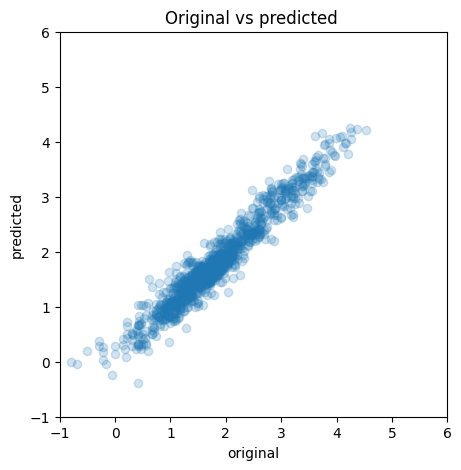

In [ ]:
best_model = grid_search.best_estimator_

y_pred = grid_search.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.1721675680614643 
Mean Squared Error: 0.048912959270483024
R2 Score: 0.933350927930725


### SVM Regressor

In [ ]:
# classifier
svm = SVR()

# parameter grid for gridsearch
#param_grid = {
#    'kernel': ['linear', 'rbf', 'poly'],
#    'C': [0.1, 1, 10],
#}

#grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
#grid_search.fit(x_train, y_train)
svm.fit(x_train, y_train)


SVR()

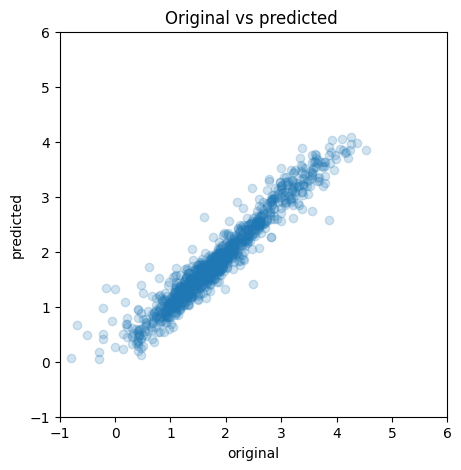

In [ ]:
#best_model = grid_search.best_estimator_

#y_pred = grid_search.predict(x_test)
y_pred = svm.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.1721675680614643 
Mean Squared Error: 0.048912959270483024
R2 Score: 0.933350927930725


### SVR with gridsearch

In [ ]:
# classifier
svm = SVR()

# parameter grid for gridsearch
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
}

grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
#svm.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

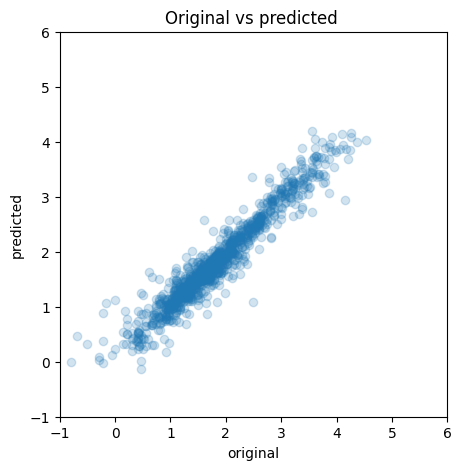

In [ ]:
best_model = grid_search.best_estimator_

y_pred = grid_search.predict(x_test)
#y_pred = svm.predict(x_test)

plt.figure(figsize = (5, 5))
plt.title('Original vs predicted ')
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlabel('original')
plt.ylabel('predicted')
plt.xlim((-1, 6))
plt.ylim((-1, 6))

plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE} \nMean Squared Error: {MSE}\nR2 Score: {R2}")

Mean Absolute Error: 0.1629352006284928 
Mean Squared Error: 0.05634886448222492
R2 Score: 0.9232187218702188
